# Home assignment 1: Kalman filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_log = []
    e_log = []
    
    # adding init states
    x_log.append(x)
    e_log.append(E)
    

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        x_log.append(x)
        E = (I - (K @ H)) @ E
        e_log.append(E)
        
        print(f"x= \n{x}")
        print(f"E= \n{E}")

    return np.array(k_log), np.array(x_log), np.array(e_log)

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [33]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0, 0, 1000, 1000])

# next state function: 4D
F = np.diag([1.] * 4) + np.diag([0.1, 0.1], k=2)

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([
    [1., 0, 0, 0],
    [0, 1., 0, 0]
])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1] * 2)

# 4D identity matrix
I = np.diag([1.] * 4)

## First experiment

In [34]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [35]:
k_log, x_log, e_log = kalman_filter(x, E)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  5.99600798]
 [  8.00838323]
 [  9.98003992]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  6.99785867]
 [  6.00449679]
 [  9.99286224]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  7.99866711]
 [  4.00279907]
 [  9.99666778]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [95]:
def plot_x_params(x_log, e_log, dt=dt):
    x_params = ['x position', 'y position', 'Velocity x axis', 'Velocity y axis']
    
    time_space = np.arange(0, len(x_log) * dt, dt)
    
    # PLT subplots
    fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
    for i, param in enumerate(x_params):
        cur_ax = ax[i // 2][i % 2]
        x = x_log[:, i].squeeze()
        ci = np.sqrt(e_log[:,i,i].squeeze())
        cur_ax.fill_between(time_space, (x - ci), (x + ci), color='b', alpha=.2)
        cur_ax.errorbar(time_space, x, yerr=ci, color='b')
        cur_ax.set_xlabel('Time, sec')
        cur_ax.set_ylabel(param)
        cur_ax.set_title(f'Plot with CI for {param}')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    vx = x_log[:, 2].squeeze()
    vy = x_log[:, 3].squeeze()
    ci_vx = np.sqrt(e_log[:,2,2].squeeze())
    ci_vy = np.sqrt(e_log[:,3,3].squeeze())
    plt.plot(vx, vy)
    plt.errorbar(vx, vy, xerr=ci_vx, yerr=ci_vy, color='b')
    plt.title('Trajectory')
    plt.xlabel('X coordinates')
    plt.ylabel('Y coordinates')
    plt.show()
    
def vis_k(k_log):
    x_params = ['Kx position', 'Ky position', 'K Velocity x ', 'K Velocity y']
    time_space = np.arange(0.1, len(k_log) * dt, dt) # start from the first approx.
    
    for i, param in enumerate(x_params):
        k = k_log[:, i, i % 2].squeeze()
        plt.plot(time_space, k, label=param)
        plt.xlabel('Time, sec')
        plt.ylabel('K value')
        plt.title(f'Plot for k values for all params')
    plt.legend()
    plt.show()
    
    

        

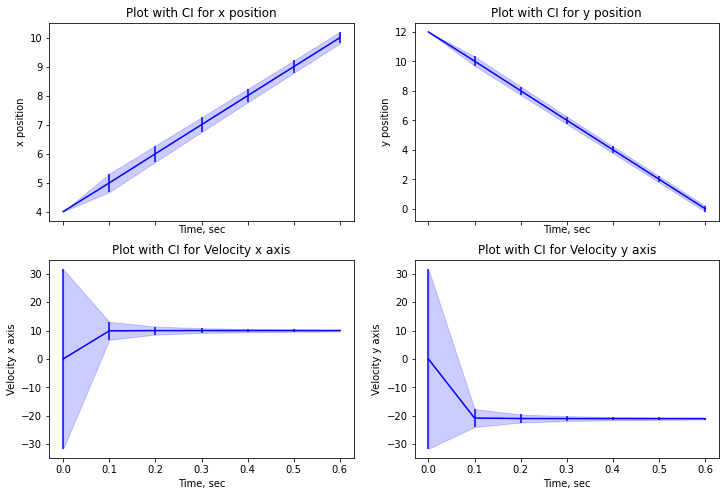

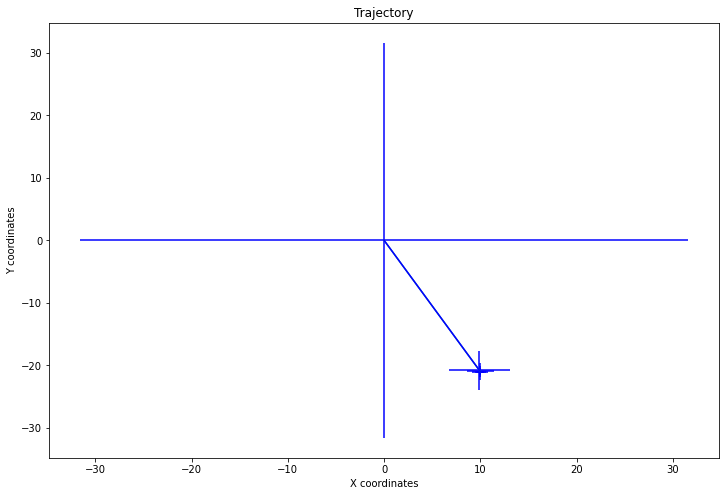

In [96]:
plot_x_params(x_log, e_log)

Visualize the components of the $ K $ matrix below

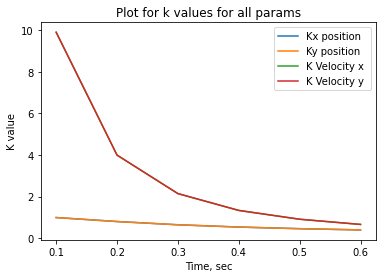

In [97]:
vis_k(k_log)

## Second experiment

In [98]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [99]:
k_log, x_log, e_log = kalman_filter(x, E)

x= 
[[  0.95049505]
 [  4.04059406]
 [ 49.5049505 ]
 [-40.59405941]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[ 5.98003992e+00]
 [ 1.63672655e-02]
 [ 4.99001996e+01]
 [-4.09181637e+01]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[ 10.98929336]
 [ -3.99122056]
 [ 49.96431121]
 [-40.97073519]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[ 15.99333555]
 [ -7.99453515]
 [ 49.98333889]
 [-40.98633789]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

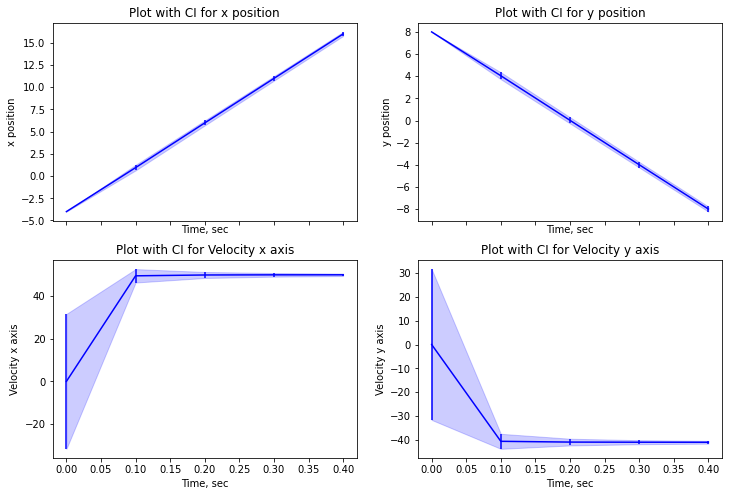

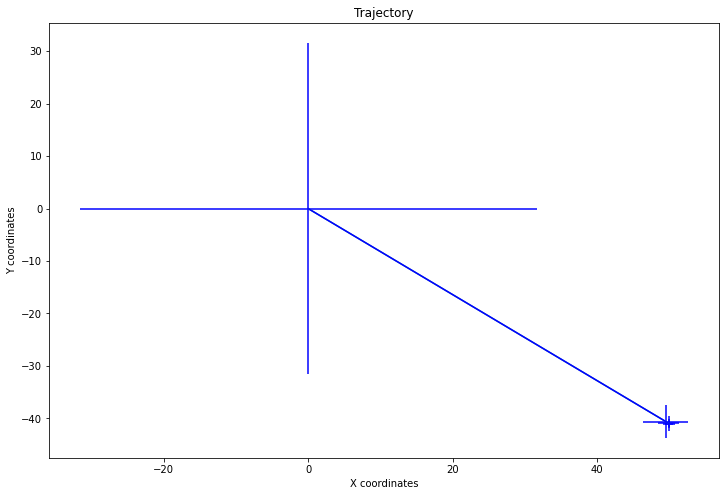

In [100]:
plot_x_params(x_log, e_log)

Visualize the components of the $ K $ matrix below

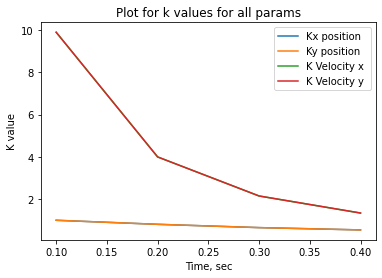

In [101]:
vis_k(k_log)

## Third Experiment

In [102]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [103]:
k_log, x_log, e_log = kalman_filter(x, E)

x= 
[[  1.        ]
 [ 17.02079208]
 [  0.        ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  1.        ]
 [ 15.00838323]
 [  0.        ]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  1.        ]
 [ 13.00449679]
 [  0.        ]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  1.        ]
 [ 11.00279907]
 [  0.        ]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

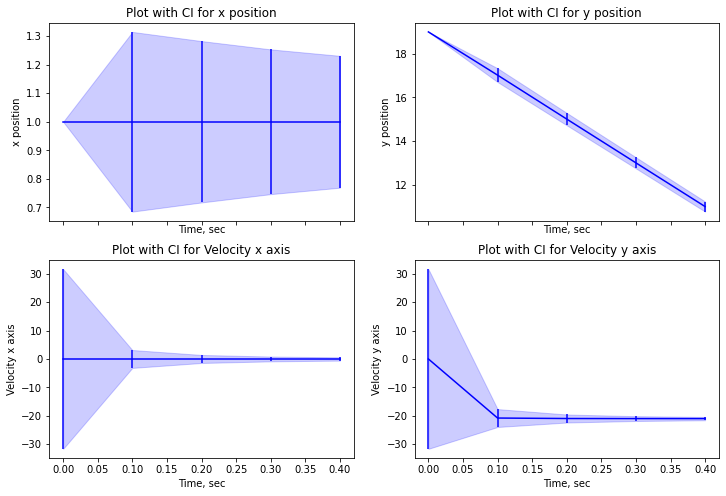

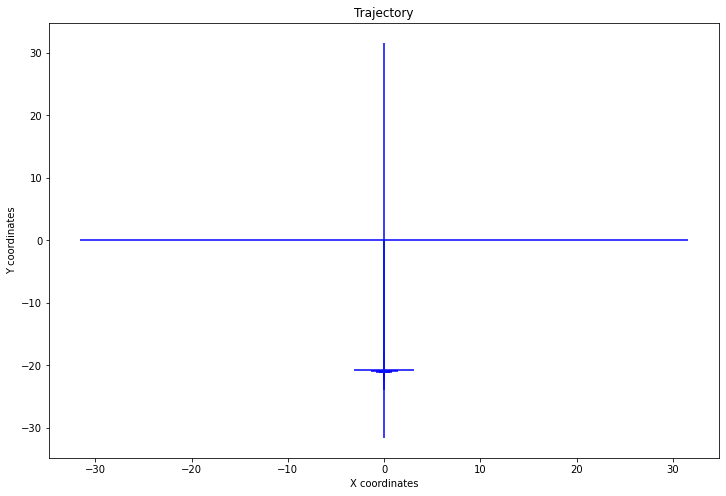

In [104]:
plot_x_params(x_log, e_log)

Visualize the components of the $ K $ matrix below

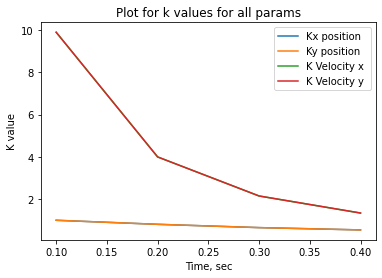

In [105]:
vis_k(k_log)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

**Q:** What does the dynamics of changes in its components *(K)* say?

**A:** Из графиков видно что зависимость компонент К от времени коррелирует с доверительным интервалом который мы видим на графиках зависимости предсказываемых перменных от времени, с уменьшением K уменьшается и ошибка (СКВО). Следовательно мы можем с большей точностью предсказывать положение в будущем на основе модеоирования, наше облако точек в многомерном пространстве сжимается, за счет чего и увеличивается точность предсказаний и уменьшается ошибка.

**Q:** How much does the velocity uncertainty decrease as a result of each experiment?

**A:** Сначала ошибка предсказаний скорости очень велика +-30 у.е., скорее всего это связано с большим значением изначальной матрицей ковариации (где значение для скоростей мы выставили в 1000), однако со временем видно что точность предсказаний увеличивается (неопределенность уменьшается), так как мы происзводим вычисления не по одной точке с большой СКВО, но уже учитывая предыдущие предсказания, что позволяет сильно уменьшить неопределенность.